# 차원 축소(Demensionality reduction)
- 모델 단순화(해석을 용이하게 하기 위해)
- 학습 시간 단축
- 차원의 저주(Curse of Dimensionality) 회피
- 과적합(Overfitting) 줄임

### 피처 선택(Feature selection), 피처 추출(Feature extraction)의 단계를 거침
- 피처 추출 시 사용하는 기법
    - PCA
    - LDA
    - SVD
    - NMF

# LDA(Linear Discriminant Analysis)
- 입력 데이터의 클래스 분리를 최대화하는 축을 찾음
    - 클래스 간 분산과 클래스 내부 분산의 비율을 최대화(클래스 간 간격/클래스 내부 분산 => 최대화)

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [4]:
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


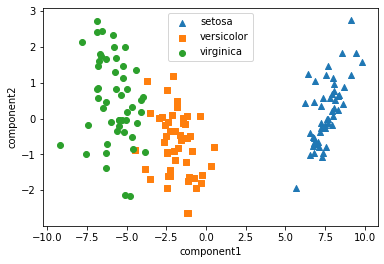

In [9]:
df_lda = pd.DataFrame(iris_lda, columns=['component1', 'component2'])
df_lda['target'] = iris.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_data = df_lda[df_lda['target'] == i]['component1']
    y_data = df_lda[df_lda['target'] == i]['component2']
    plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

    
plt.legend()
plt.xlabel('component1')
plt.ylabel('component2')
plt.show()